# Analyzing Data


**We'll be performing a high-level analysis our dataset.**


**Load Dependencies & Constants**


In [28]:

import numpy as np
import librosa, librosa.display
import matplotlib.pyplot as plt
import json
import pandas as pd



**Load .wav file from Marsyas Dataset**


In [40]:

genre = "classical" # ["blues", "classical", "country", "disco", "hiphop", "jazz", "metal", "pop", "reggae", "rock"]
file_no = "03" # 00 - 99
file_path = "data/gtzan_genres/{}/{}.000{}.wav".format(genre,genre,file_no)
print("LOADING FILE: {}".format(file_path))
    
signal, sample_rate = librosa.load(file_path, sr = 22050)



LOADING FILE: data/gtzan_genres/classical/classical.00003.wav


**Display Waveform of .wav file**


Text(0.5, 1.0, 'Waveform')

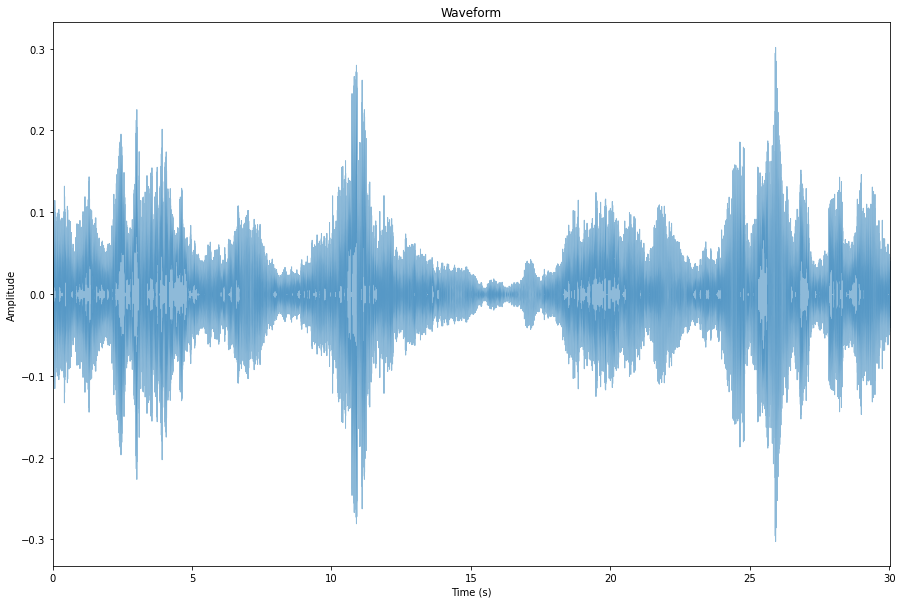

In [41]:

FIGURE_SIZE = (15,10)
plt.figure(figsize=FIGURE_SIZE)
librosa.display.waveplot(signal, sample_rate, alpha=0.5)
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.title("Waveform")


**Generate and plot spectrogram for .wav file**


In [42]:

HOP_LENGTH = 512
N_FFT = 2048


**Apply Short Term Fourier Transform (STFT) on .wav file**


In [43]:

stft = librosa.stft(signal, n_fft=N_FFT, hop_length=HOP_LENGTH)


**Extract & Plot Spectrogram (Amplitude) of Audio File** 


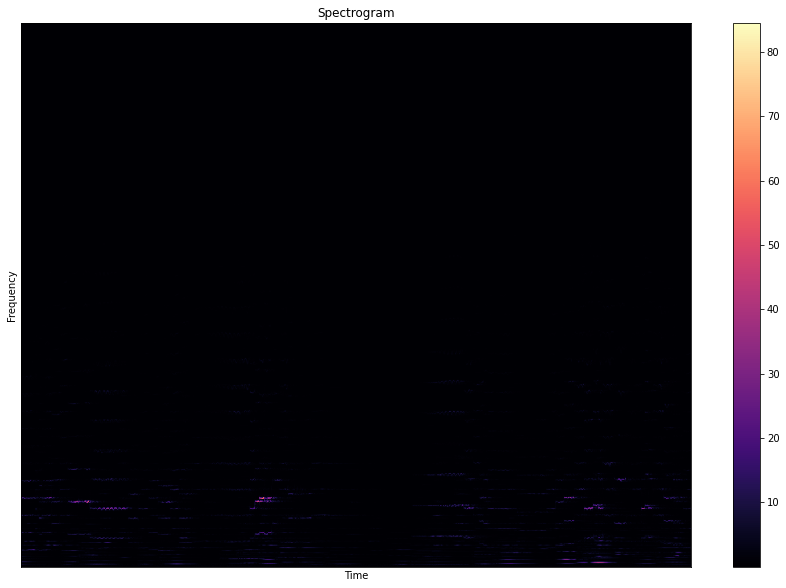

In [44]:

spectrogram = abs(stft)
plt.figure(figsize=FIGURE_SIZE)

librosa.display.specshow(spectrogram, sr=sample_rate, hop_length=HOP_LENGTH)

plt.xlabel("Time")
plt.ylabel("Frequency")
plt.title("Spectrogram")
plt.colorbar()



**Plot Spectrogram in terms of Decibels**


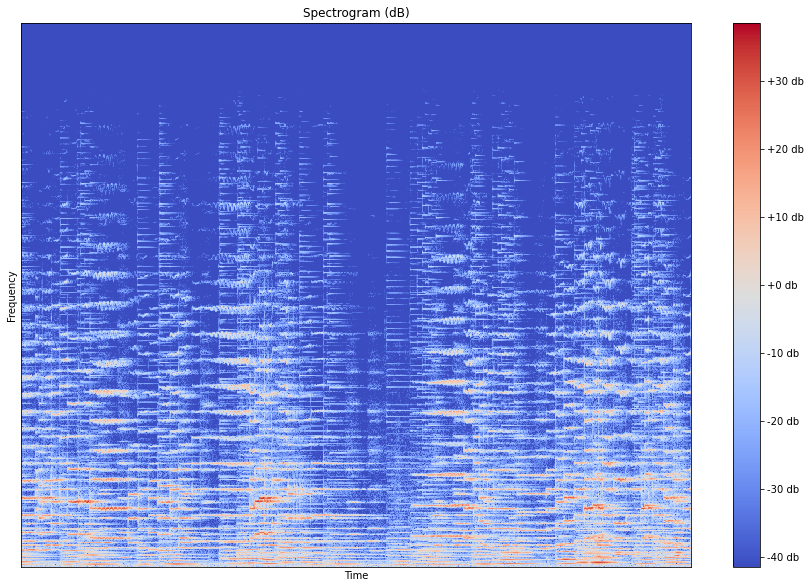

In [45]:

log_spectrogram = librosa.amplitude_to_db(spectrogram)
plt.figure(figsize=FIGURE_SIZE)

librosa.display.specshow(log_spectrogram, sr= sample_rate, hop_length=HOP_LENGTH)
plt.xlabel("Time")
plt.ylabel("Frequency")
plt.title("Spectrogram (dB)")
plt.colorbar(format="%+2.0f db")


**Extract & Plot Mel-Frequency Cepstrum Coefficients**


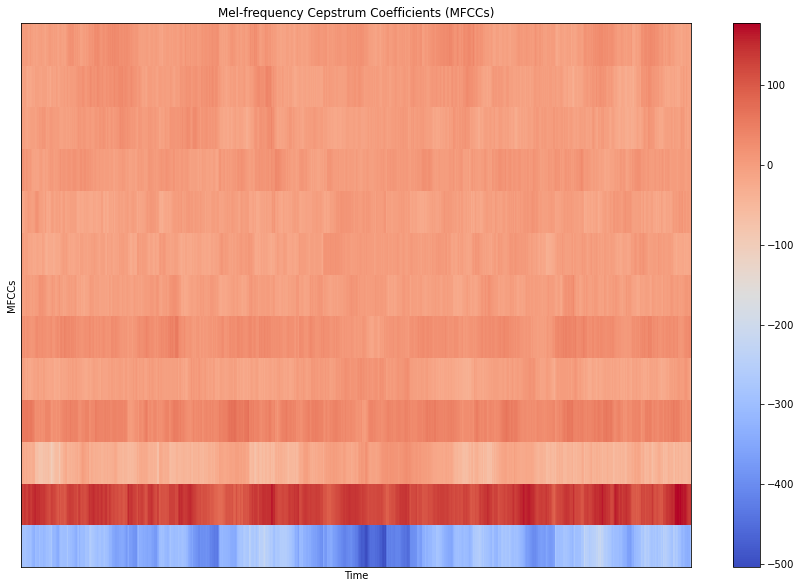

In [46]:
N_MFCC = 13
mfcc = librosa.feature.mfcc(signal,sample_rate,n_fft=N_FFT, hop_length=HOP_LENGTH, n_mfcc= N_MFCC)
plt.figure(figsize=FIGURE_SIZE)

librosa.display.specshow(mfcc, sr= sample_rate, hop_length=HOP_LENGTH)
plt.xlabel("Time")
plt.ylabel("MFCCs")
plt.title("Mel-frequency Cepstrum Coefficients (MFCCs)")
plt.colorbar()
